In [0]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df=pd.read_csv('hello.csv')

In [3]:
df

Banks     1     2  ...    35     36    37
0                        Allahabad Bank  8.60  8.60  ...  8.30   8.30  8.25
1                           Andhra Bank  8.65  8.65  ...  8.30   9.30  8.20
2                        Bank of Baroda  8.35  8.35  ...  8.25  10.30  8.15
3                         Bank of India  8.50  8.50  ...  8.20  11.30  8.20
4                   Bank of Maharashtra  8.75  8.75  ...  8.40  12.30  8.25
..                                  ...   ...   ...  ...   ...    ...   ...
71             State Bank of  Mauritius  9.00  8.90  ...  9.60   9.60  9.60
72  Sumitomo Mitsui Banking Corporation  7.15  7.25  ...  6.90   6.20  6.20
73                 United Overseas Bank  8.75  8.50  ...  6.80   6.92  6.56
74          Westpac Banking Corporation  9.00  9.00  ...  8.75   8.75  8.75
75                           Woori Bank  8.00  7.90  ...  8.40   8.40  8.40

[76 rows x 38 columns]

In [0]:
df=df.values

[8.6 8.6 8.6 8.6 8.5 8.5 8.5 8.45 8.45 8.3 8.25 8.25 8.25 8.25 8.25 8.3
 8.35 8.45 8.45 8.5 8.5 8.55 8.65 8.75 8.75 8.65 8.65 8.6 8.55 8.55 8.4
 8.4 8.35 8.35 8.3 8.3 8.25]


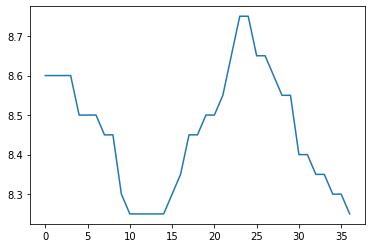

In [5]:
#Allahabad Bank

data=df[0,1:]
print(data)

plt.figure()
plt.plot(data)
plt.show()

In [6]:
y=[]
for i in range (df.shape[0]):
  y.append(df[i][1:])
y=np.array(y)

avgs=[]
for i in range (y.shape[0]):
  avgs.append(np.mean(y[i]))
avgs=np.array(avgs)

print(y.shape,avgs.shape)

(76, 37) (76,)


In [7]:
predic=[]
div=0
for i in range (df.shape[0]):
  sum=0
  div=0
  # last 6 months
  for j in range (y.shape[1]-6,y.shape[1]): 
    sum=sum+y[i][j]
    div=div+1
  # this month in previos years
  for j in range (y.shape[1]-1,0,-12):
    sum=sum+y[i][j]
    div=div+1

  predic.append(sum/div)
  
predic=np.array(predic)
print(predic)
print(predic.shape)

[ 8.35555556  8.46111111  8.55        8.65555556  8.87777778  8.36111111
  8.21666667  8.59444444  8.36666667  8.52222222  8.32777778  8.48888889
  8.18888889  8.02222222  8.33888889  8.40555556  8.25555556  8.45555556
  8.32777778 10.06        9.86666667  9.06111111 10.35555556  9.76111111
  8.93333333  8.29444444  8.35555556  9.22222222  9.41666667  8.59444444
  9.13888889  9.39111111  8.56111111 10.20555556  8.31111111  9.73333333
  9.11111111  9.09444444  9.65        6.75555556  9.42222222  7.15555556
  9.19444444  8.27222222  7.50555556  9.71666667  7.65888889  6.89444444
  7.81111111  7.89444444  8.17777778  7.14        7.44666667  7.11444444
  9.23888889  8.29444444  8.52777778  8.44111111  8.41666667  7.59666667
  5.92222222  7.60555556  7.70333333  7.55        8.33333333  7.81111111
  7.91444444  8.31444444  7.81111111  7.14555556  9.2         8.92777778
  6.83333333  7.45555556  8.72222222  8.34444444]
(76,)


In [8]:
diff=[]
for i in range (y.shape[0]):
  # finding absolute difference
  diff.append(abs(predic[i]-avgs[i]))

diff=np.array(diff)
print(diff.shape)
print(diff)

(76,)
[0.10255255 0.11186186 0.05945946 0.11501502 0.11831832 0.11321321
 0.19684685 0.16501502 0.13198198 0.0548048  0.2033033  0.13813814
 0.14219219 0.1521021  0.22192192 0.13093093 0.16201201 0.23228228
 0.14249249 0.18486486 0.01711712 0.15510511 0.12393393 0.046997
 0.08477477 0.07312312 0.05660661 0.24114114 0.02612613 0.19474474
 0.10375375 0.00597598 0.20375375 0.44069069 0.10510511 0.0045045
 0.07807808 0.07852853 0.29054054 0.21768769 0.25735736 0.62012012
 0.13663664 0.18858859 0.26606607 0.17630631 0.44408408 0.33798799
 0.33753754 0.63258258 0.09924925 0.64324324 0.13198198 0.69393393
 0.38678679 0.16096096 0.00546547 0.16645646 0.0309009  0.81306306
 0.79129129 0.85795796 0.39072072 0.29459459 0.16036036 0.23105105
 0.63177177 0.03930931 0.29159159 0.04501502 0.15       0.19114114
 0.72747748 0.9557958  0.04249249 0.17552553]


In [9]:
predic[5]

8.36111111111111

In [ ]:
amount=input() # it is amount deposited
t=input() # it is time period in years
i=input() #it is the specified bank
ubound=int(predic[i]) + int(diff[i])
lbound=predic[i] - diff[i]

hvalue = (amount*t*ubound)/100 #calculating higher value
lvalue = (amount*t*lbound)/100 #calculating lower value

print(hvalue,lvalue)

Error: Jupyter cannot be started. Error attempting to locate jupyter: 